In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Importing the data
data = pd.read_excel('Data/Inflation/InflationPct.xlsx')
print(data.head())


   Year  Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec  Ave
0  1968  2.3  2.9  3.2  4.0  4.3  3.7  3.4  3.4  4.0  4.3  4.0  4.2  3.4
1  1969  3.9  3.6  3.9  3.9  3.9  5.0  5.5  5.5  5.7  5.2  6.3  7.1  5.2
2  1970  7.0  7.6  7.0  7.0  6.9  5.8  5.2  4.7  4.4  4.7  3.3  2.3  5.2
3  1971  2.0  1.8  2.8  3.0  3.0  3.5  3.5  3.7  3.0  3.0  3.5  4.2  3.2
4  1972  4.0  5.2  4.4  3.6  3.4  3.1  3.6  3.6  4.6  4.6  5.0  4.5  4.1


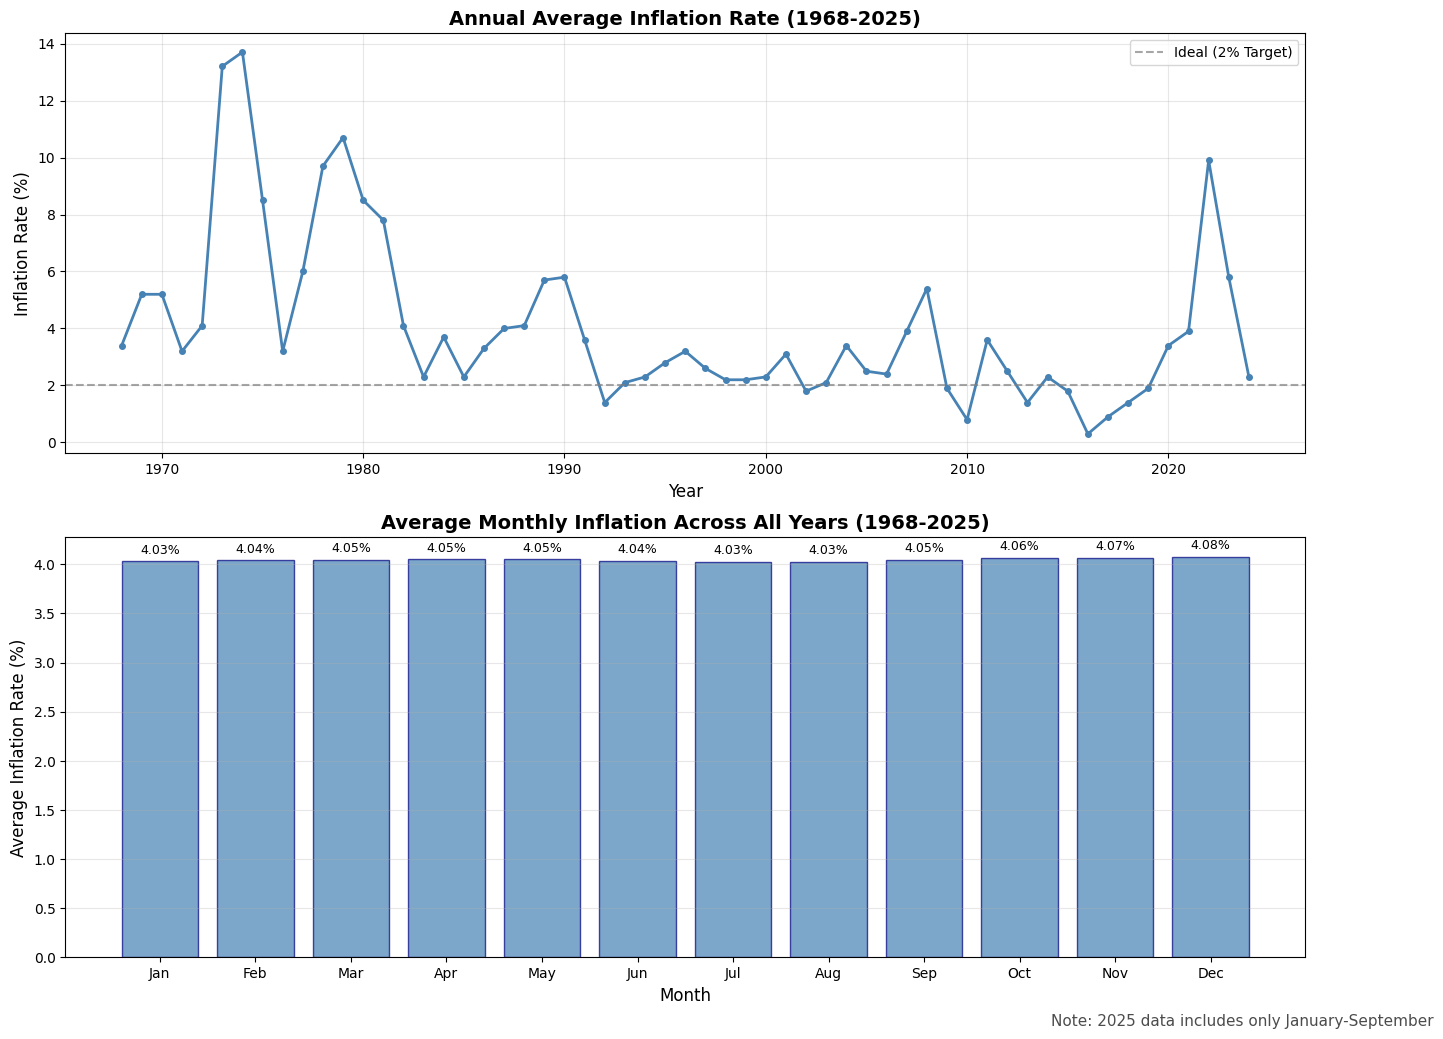

In [ ]:
df = pd.DataFrame(data)
df.set_index('Year')

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

# Chart 1: Line Chart
ax1.plot(df['Year'], df['Ave'], marker='o', markersize=4, linewidth=2, color='steelblue')
ax1.set_title('Annual Average Inflation Rate (1968-2025)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Inflation Rate (%)', fontsize=12)
ax1.set_xlabel('Year', fontsize=12)
ax1.grid(True, alpha=0.3)

# Adds gray line to display ideal 2% inflation
ax1.axhline(y=2, color='gray', linestyle='--', linewidth=1.5, alpha=0.7, label='Ideal (2% Target)')
ax1.legend(loc='best')


# Chart 2: Bar Chart
# Calculates average for each month across all years
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

monthly_averages = []
for month in months:
    monthly_avg = df[month].mean()
    monthly_averages.append(monthly_avg)

# Bar Chart code
bars = ax2.bar(months, monthly_averages, color='steelblue', alpha=0.7, edgecolor='navy')
ax2.set_title('Average Monthly Inflation Across All Years (1968-2025)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Month', fontsize=12)
ax2.set_ylabel('Average Inflation Rate (%)', fontsize=12)
ax2.grid(True, alpha=0.3, axis='y')

# Labeling for each bar
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.05,
            f'{height:.2f}%', ha='center', va='bottom', fontsize=9)

# Adds a note for the fact that the 2025 data is not yet complete
fig.text(0.98, 0.05, 'Note: 2025 data includes only January-September',
            ha='right', va='bottom', fontsize=11,
            color='black', alpha=0.7)

#plt.savefig('HouseholdGroceryInflation.png',bbox_inches = 'tight',facecolor='white')
plt.show()

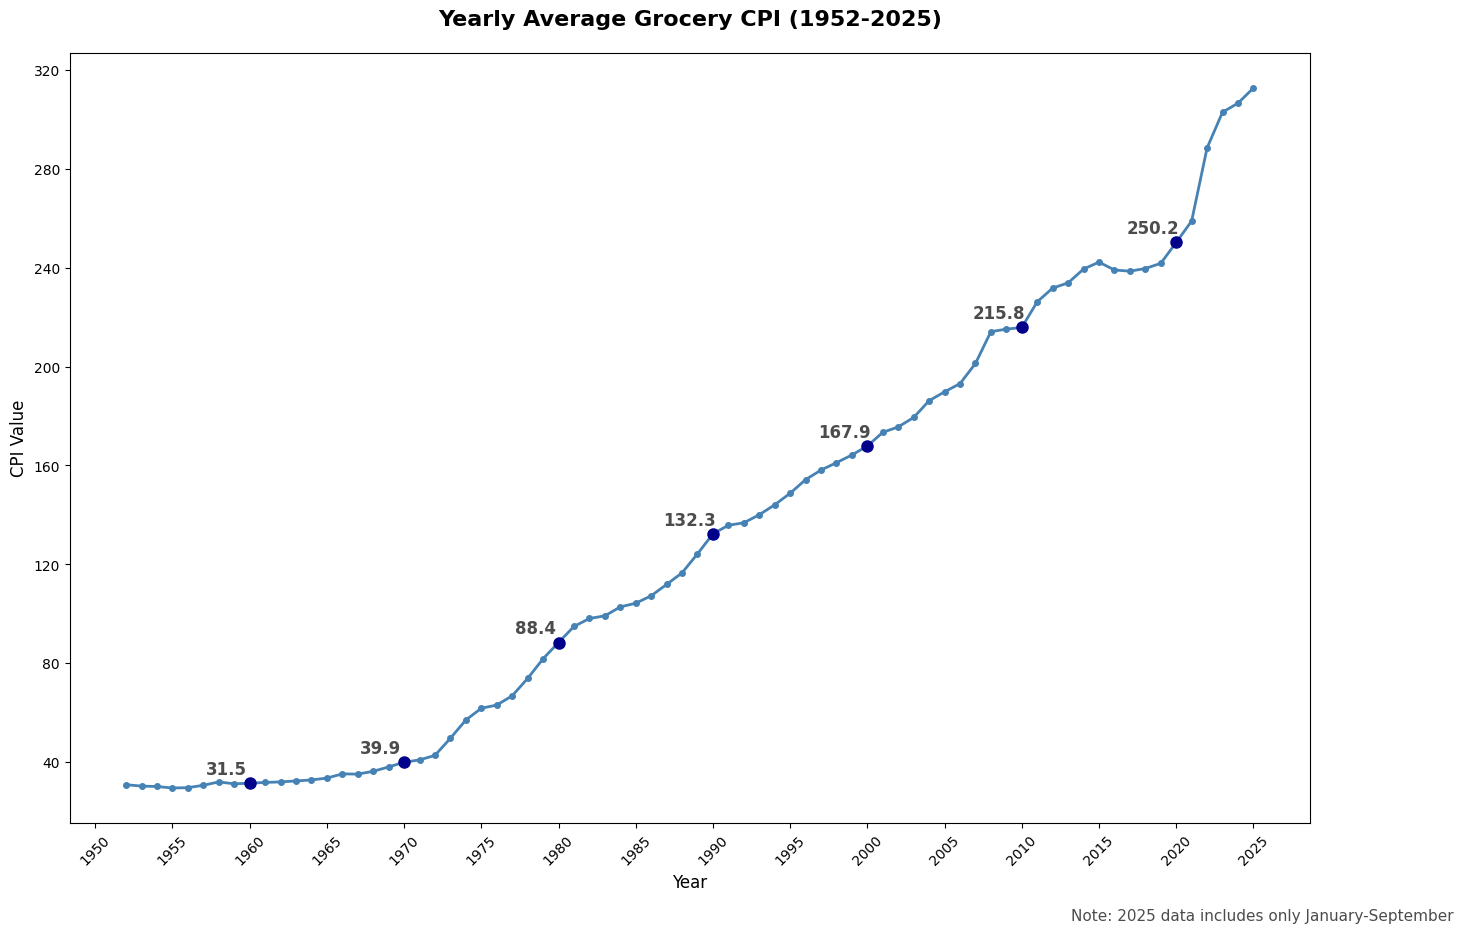

In [ ]:
# Need to import dates in order to get the years from the way the file wrote them
import matplotlib.dates as mdates

# Load the data from CSV file
df = pd.read_csv('/Data/Inflation/FoodCPIAvg.csv')

# Extracting year from date
df['observation_date'] = pd.to_datetime(df['observation_date'])
df['year'] = df['observation_date'].dt.year

# Takes the averages for each year
yearavg = df.groupby('year')['CUSR0000SAF11'].mean().reset_index()


# Create the line chart
plt.figure(figsize=(16, 10))
plt.plot(yearavg['year'], yearavg['CUSR0000SAF11'],
         marker='o', linewidth=2, markersize=4, color='steelblue')
plt.title('Yearly Average Grocery CPI (1952-2025)',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('CPI Value', fontsize=12)
plt.xticks(range(1950, 2030, 5), rotation=45)
plt.yticks(range(0, 360, 40))

# Displays average every decade for visual clarity and comparison
for i in range(len(yearavg)):
  year = yearavg.iloc[i]['year']
  value = yearavg.iloc[i]['CUSR0000SAF11']
  if year % 10 == 0:
    plt.plot(year, value, marker='o', markersize=8,
             color='darkblue')
    plt.text(year - 1.5, value + 2, f'{value:.1f}', fontsize=12,
             ha='center', va='bottom', alpha=0.7, fontweight='bold')


# Adds a note for the fact that the 2025 data is not yet complete
plt.figtext(0.99, 0.01, 'Note: 2025 data includes only January-September',
            ha='right', va='bottom', fontsize=11,
            color='black', alpha=0.7)


#plt.savefig('FoodCPI.png',bbox_inches = 'tight',facecolor='white')
plt.show()